In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 16})

## Read the 4 csv files and assign to 4 different data frame and delete the unnecessary columns. Filter all the 4 data frames with strength = 0.4 and italic = 0 and assign them to 4 different class.

In [3]:
selected_file = ["GILL.csv", "LEELAWADEE.csv", "ROMAN.csv", "TECHNIC.csv"]
col_to_be_skipped = ["strength", "italic", "fontVariant", "m_label", "orientation", "m_top", "m_left", "originalH", 
                     "originalW", "h", "w"]
for i in range(4):
    temp_df = pd.read_csv(selected_file[i])
    temp_df = temp_df[(temp_df["strength"] == 0.4) & (temp_df["italic"] == 0)]
    globals()["CL" + str(i + 1)] = temp_df.drop(col_to_be_skipped, axis = 1)

## Print out the size of each class and the total size of 4 classes.

In [4]:
class_size = pd.DataFrame()
total_size = 0
for i in range(4):
    temp = len(eval("CL" + str(i + 1)))
    class_size.loc["CL" + str(i + 1), "Size"] = temp
    total_size += temp
    
class_size.loc["Total", "Size"] = total_size
class_size

,Size
CL1,1459.0
CL2,1378.0
CL3,1194.0
CL4,1380.0
Total,5411.0


## Combine all the 4 classes and assign to a data frame.

In [5]:
df = pd.concat([CL1, CL2, CL3, CL4])
df.reset_index(inplace = True, drop = True)
df

,font,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,GILL,1,1,1,1,1,25,89,178,255,...,1,1,199,255,255,255,255,255,255,255
1,GILL,1,1,1,1,1,25,89,178,255,...,1,1,199,255,255,255,255,255,255,255
2,GILL,1,1,1,1,1,25,89,178,255,...,1,1,199,255,255,255,255,255,255,255
3,GILL,1,1,1,1,1,25,89,178,255,...,1,1,199,255,255,255,255,255,255,255
4,GILL,1,1,1,1,1,1,1,1,182,...,255,182,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,TECHNIC,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5407,TECHNIC,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5408,TECHNIC,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5409,TECHNIC,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


## Problem 1

### 1.1 Statistical Analysis on Feature X210 i.e. r10c9
#### Calculate the mean value of feature X210 for each class.

In [6]:
X210_mean = pd.DataFrame()
for i in range(4):
    temp = eval("CL" + str(i + 1))
    X210_mean.loc["CL" + str(i + 1), "Mean"] = round(np.mean(temp.loc[:, "r10c9"]), 1)

X210_mean

,Mean
CL1,146.7
CL2,68.3
CL3,59.1
CL4,82.7


#### Conduct t-test for 4 classes.

In [7]:
from scipy import stats
from itertools import combinations
pair_list = list(combinations(["CL" + str(i + 1) for i in range(4)], 2))
ttest_result = pd.DataFrame()
for i in range(len(pair_list)):
    temp_1 = eval(pair_list[i][0]).loc[:, "r10c9"]
    temp_2 = eval(pair_list[i][1]).loc[:, "r10c9"]
    ttest_result.loc[i, "1st Class"] = pair_list[i][0]
    ttest_result.loc[i, "2nd Class"] = pair_list[i][1]
    temp_pvalue = stats.ttest_ind(temp_1, temp_2)[1]
    ttest_result.loc[i, "p-value"] = round(temp_pvalue, 2)
    ttest_result.loc[i, "p-value < 0.1"] = round(temp_pvalue, 2) < 0.1

ttest_result

,1st Class,2nd Class,p-value,p-value < 0.1
0,CL1,CL2,0.00,True
1,CL1,CL3,0.00,True
2,CL1,CL4,0.00,True
3,CL2,CL3,0.02,True
4,CL2,CL4,0.00,True
5,CL3,CL4,0.00,True


#### Plot the histogram of Feature X210 of each class.

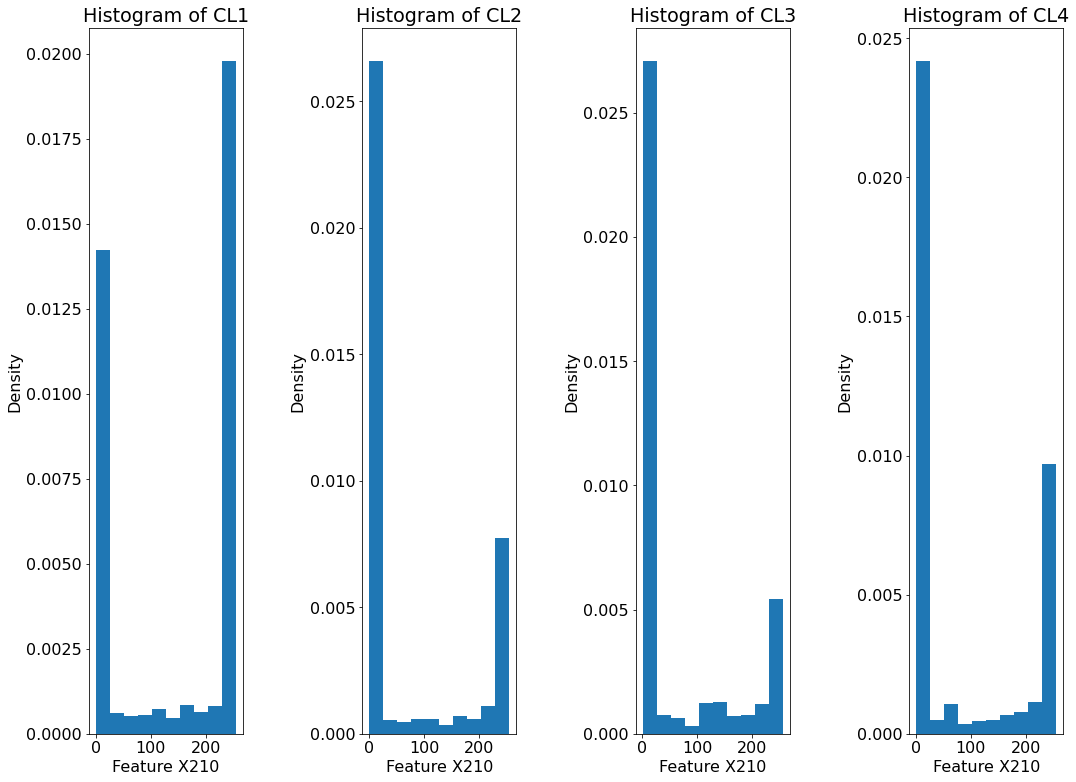

In [8]:
fig, axs = plt.subplots(1, 4)
for i in range(4):
    temp = eval("CL" + str(i + 1)).loc[:, "r10c9"]
    axs[i].hist(temp, density = True)
    axs[i].set_title("Histogram of " + "CL" + str(i + 1))
    axs[i].set_ylabel("Density")
    axs[i].set_xlabel("Feature X210")
    
fig.tight_layout(pad=3.0)
plt.show()

#### Conduct KS-test for 4 classes.

In [9]:
kstest_result = pd.DataFrame()
for i in range(len(pair_list)):
    temp_1 = eval(pair_list[i][0]).loc[:, "r10c9"]
    temp_2 = eval(pair_list[i][1]).loc[:, "r10c9"]
    kstest_result.loc[i, "1st Class"] = pair_list[i][0]
    kstest_result.loc[i, "2nd Class"] = pair_list[i][1]
    temp_pvalue = stats.kstest(temp_1, temp_2)[1]
    kstest_result.loc[i, "p-value"] = round(temp_pvalue, 2)
    kstest_result.loc[i, "p-value < 0.1"] = round(temp_pvalue, 2) < 0.1

kstest_result

,1st Class,2nd Class,p-value,p-value < 0.1
0,CL1,CL2,0.0,True
1,CL1,CL3,0.0,True
2,CL1,CL4,0.0,True
3,CL2,CL3,0.0,True
4,CL2,CL4,0.0,True
5,CL3,CL4,0.0,True


### 1.2 Correlation Values

In [10]:
df.columns = ["font"] + list(range(1,401))
CORR = pd.DataFrame(np.tril(np.abs(round(df[1:].corr(), 2)), -1))
top10_cor = CORR.unstack().sort_values(ascending = False).head(10).to_frame().reset_index()
top10_cor.columns = ["Pixel_1", "Pixel_2", "Correlation"]
top10_cor

,Pixel_1,Pixel_2,Correlation
0,389,390,0.93
1,159,179,0.93
2,198,218,0.93
3,180,200,0.93
4,220,240,0.93
5,199,219,0.93
6,241,261,0.93
7,109,110,0.93
8,200,220,0.93
9,369,370,0.93


### 1.3 Calculate the mean and standard deviation of each feature. Then, standardize each feature.

In [11]:
from sklearn.preprocessing import StandardScaler
s_df = df.copy()
SS = StandardScaler().fit(s_df.iloc[:, 1:])
s_X = pd.DataFrame(SS.transform(s_df.iloc[:, 1:]))
s_X.columns = list(range(1,401))
s_df = pd.concat([s_df.iloc[:, 0], s_X], axis = 1)
s_df

,font,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,GILL,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
1,GILL,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
2,GILL,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
3,GILL,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
4,GILL,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.948643,-1.057909,-1.100480,0.491606,...,0.931823,0.407013,-1.162936,-1.145409,-1.038984,-0.907903,-0.853926,-0.830463,-0.832267,-0.784684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,TECHNIC,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
5407,TECHNIC,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
5408,TECHNIC,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
5409,TECHNIC,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120


### 1.4 Assign class number to each case respectively.

In [12]:
fonts = list(pd.unique(s_df["font"]))
for i in range(4):
    s_df["font"].replace(fonts[i], i+1, inplace = True)

s_df.columns = ["TRUC"] + list(s_df.columns[1:])
s_df

,TRUC,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,1,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
1,1,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
2,1,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
3,1,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.732124,-0.261998,0.487987,1.137754,...,-1.277375,-1.184494,0.640276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
4,1,-0.636531,-0.691451,-0.724911,-0.778386,-0.847067,-0.948643,-1.057909,-1.100480,0.491606,...,0.931823,0.407013,-1.162936,-1.145409,-1.038984,-0.907903,-0.853926,-0.830463,-0.832267,-0.784684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,4,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
5407,4,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
5408,4,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120
5409,4,1.835521,1.667246,1.607180,1.521729,1.452895,1.342846,1.239379,1.179016,1.137754,...,0.931823,1.048891,1.150276,1.234824,1.304965,1.364842,1.422542,1.427752,1.390311,1.530120


## Problem 2

### 2.1 Split the data set into training set and test set

In [13]:
s_training = pd.DataFrame()
s_test = pd.DataFrame()

from sklearn.model_selection import train_test_split
for i in range(4):
    temp = s_df[s_df["TRUC"] == i + 1]
    temp_train, temp_test = train_test_split(temp, train_size = 0.8, random_state = 19920221)
    s_training = pd.concat([s_training, temp_train])
    s_test = pd.concat([s_test, temp_test])

### 2.2 Preliminary kNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import time
k = [5, 10, 15, 20, 30, 40, 50]
pre_perf_table = pd.DataFrame(columns = ["k", "Training Performance", "Upper Limit(Training)", "Lower Limit(Training)",
                                         "Test Performance", "Upper Limit(Test)", "Lower Limit(Test)", 
                                         "Computing Time(s)"],
                             index = range(len(k)))
for i in range(len(k)):
    start = time.time()
    knn_model = KNeighborsClassifier(n_neighbors = k[i])
    knn_model.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
    end = time.time()
    pred_training = knn_model.predict(s_training.iloc[:, 1:])
    pred_test = knn_model.predict(s_test.iloc[:, 1:])
    
    pre_perf_table.iloc[i, 0] = k[i]
    temp_training_accuracy = np.mean(s_training.iloc[:, 0] == pred_training)
    temp_training_me = np.sqrt(temp_training_accuracy * (1 - temp_training_accuracy) / len(s_training))
    pre_perf_table.iloc[i, 1] = round(temp_training_accuracy*100, 2)
    pre_perf_table.iloc[i, 2] = round((temp_training_accuracy + 1.6*temp_training_me)*100, 2)
    pre_perf_table.iloc[i, 3] = round((temp_training_accuracy - 1.6*temp_training_me)*100, 2)
    temp_test_accuracy = np.mean(s_test.iloc[:, 0] == pred_test)
    temp_test_me = np.sqrt(temp_test_accuracy * (1 - temp_test_accuracy) / len(s_test))
    pre_perf_table.iloc[i, 4] = round(temp_test_accuracy*100, 2)
    pre_perf_table.iloc[i, 5] = round((temp_test_accuracy + 1.6*temp_test_me)*100, 2)
    pre_perf_table.iloc[i, 6] = round((temp_test_accuracy - 1.6*temp_test_me)*100, 2)
    pre_perf_table.iloc[i, 7] = round(end - start, 2)
    
pre_perf_table[["k", "Training Performance", "Test Performance", "Computing Time(s)"]]

,k,Training Performance,Test Performance,Computing Time(s)
0,5,87.99,79.78,0.08
1,10,82.28,74.88,0.07
2,15,77.22,71.38,0.08
3,20,74.45,69.71,0.08
4,30,71.6,67.22,0.07
5,40,68.97,64.36,0.07
6,50,67.12,62.51,0.07


#### Plot the k value against prediction performance.

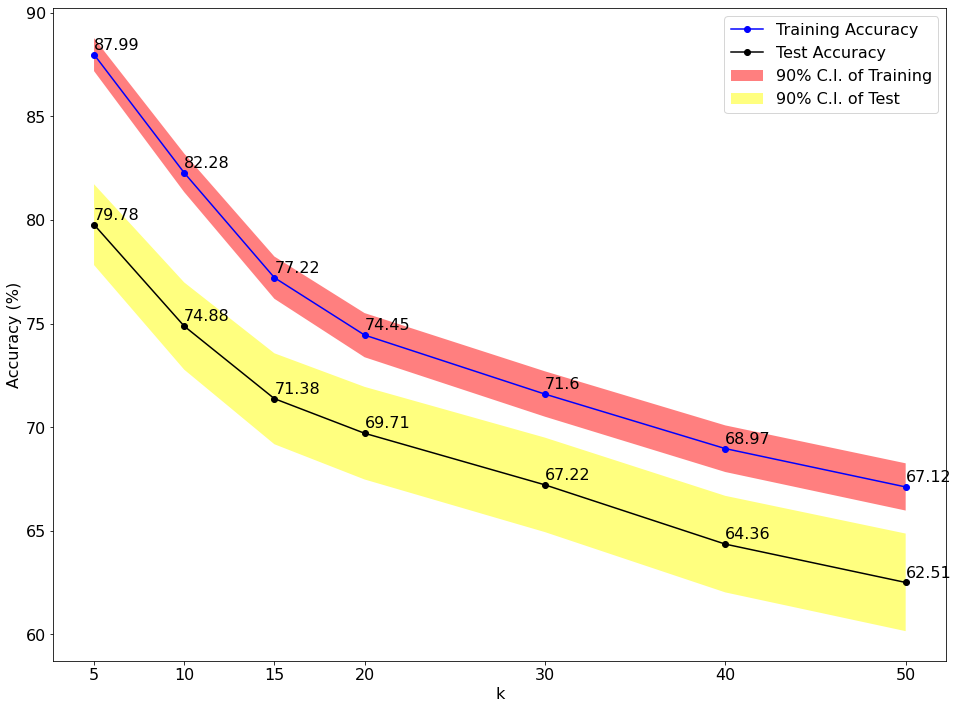

In [15]:
from matplotlib.patches import Polygon
training_CI = pre_perf_table[["k", "Upper Limit(Training)", "Lower Limit(Training)"]]
temp_list_1 = list(zip(training_CI["k"].tolist(), training_CI["Upper Limit(Training)"].tolist()))
temp_list_2 = list(zip(training_CI["k"].tolist(), training_CI["Lower Limit(Training)"].tolist()))
temp_CI_training = temp_list_1 + temp_list_2[::-1]
test_CI = pre_perf_table[["k", "Upper Limit(Test)", "Lower Limit(Test)"]]
temp_list_3 = list(zip(test_CI["k"].tolist(), test_CI["Upper Limit(Test)"].tolist()))
temp_list_4 = list(zip(test_CI["k"].tolist(), test_CI["Lower Limit(Test)"].tolist()))
temp_CI_test = temp_list_3 + temp_list_4[::-1]

fig, ax = plt.subplots(1, 1)
ax.plot(pre_perf_table["k"], pre_perf_table["Training Performance"], label = "Training Accuracy", color = "blue", marker = "o")
ax.plot(pre_perf_table["k"], pre_perf_table["Test Performance"], label = "Test Accuracy", color = "black", marker = "o")

for i in range(len(k)):
    ax.annotate(pre_perf_table.iloc[i, 1], xy = [pre_perf_table.iloc[i, 0], pre_perf_table.iloc[i, 1] + 0.25])
    ax.annotate(pre_perf_table.iloc[i, 4], xy = [pre_perf_table.iloc[i, 0], pre_perf_table.iloc[i, 4] + 0.25])

ax.add_patch(Polygon(np.array(temp_CI_training), facecolor = "red", alpha = 0.5, label = "90% C.I. of Training"))
ax.add_patch(Polygon(np.array(temp_CI_test), facecolor = "yellow", alpha = 0.5, label = "90% C.I. of Test"))

ax.set_xticks(k)
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("k")
ax.legend()
plt.show()

### 2.3 Secondary kNN

#### Test k between 3 and 10 

In [16]:
k = [3, 4, 5, 6, 7, 8, 9, 10]
sec_perf_table = pd.DataFrame(columns = ["k", "Training Performance", "Upper Limit(Training)", "Lower Limit(Training)",
                                         "Test Performance", "Upper Limit(Test)", "Lower Limit(Test)", 
                                         "Computing Time(s)"],
                             index = range(len(k)))
for i in range(len(k)):
    start = time.time()
    knn_model = KNeighborsClassifier(n_neighbors = k[i])
    knn_model.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
    end = time.time()
    pred_training = knn_model.predict(s_training.iloc[:, 1:])
    pred_test = knn_model.predict(s_test.iloc[:, 1:])
    
    sec_perf_table.iloc[i, 0] = k[i]
    temp_training_accuracy = np.mean(s_training.iloc[:, 0] == pred_training)
    temp_training_me = np.sqrt(temp_training_accuracy * (1 - temp_training_accuracy) / len(s_training))
    sec_perf_table.iloc[i, 1] = round(temp_training_accuracy*100, 2)
    sec_perf_table.iloc[i, 2] = round((temp_training_accuracy + 1.6*temp_training_me)*100, 2)
    sec_perf_table.iloc[i, 3] = round((temp_training_accuracy - 1.6*temp_training_me)*100, 2)
    temp_test_accuracy = np.mean(s_test.iloc[:, 0] == pred_test)
    temp_test_me = np.sqrt(temp_test_accuracy * (1 - temp_test_accuracy) / len(s_test))
    sec_perf_table.iloc[i, 4] = round(temp_test_accuracy*100, 2)
    sec_perf_table.iloc[i, 5] = round((temp_test_accuracy + 1.6*temp_test_me)*100, 2)
    sec_perf_table.iloc[i, 6] = round((temp_test_accuracy - 1.6*temp_test_me)*100, 2)
    sec_perf_table.iloc[i, 7] = round(end - start, 2)
    
sec_perf_table[["k", "Training Performance", "Test Performance", "Computing Time(s)"]]

,k,Training Performance,Test Performance,Computing Time(s)
0,3,92.12,81.07,0.09
1,4,90.3,81.16,0.07
2,5,87.99,79.78,0.07
3,6,87.59,79.5,0.08
4,7,85.12,77.47,0.08
5,8,84.38,77.56,0.07
6,9,82.09,74.88,0.07
7,10,82.28,74.88,0.07


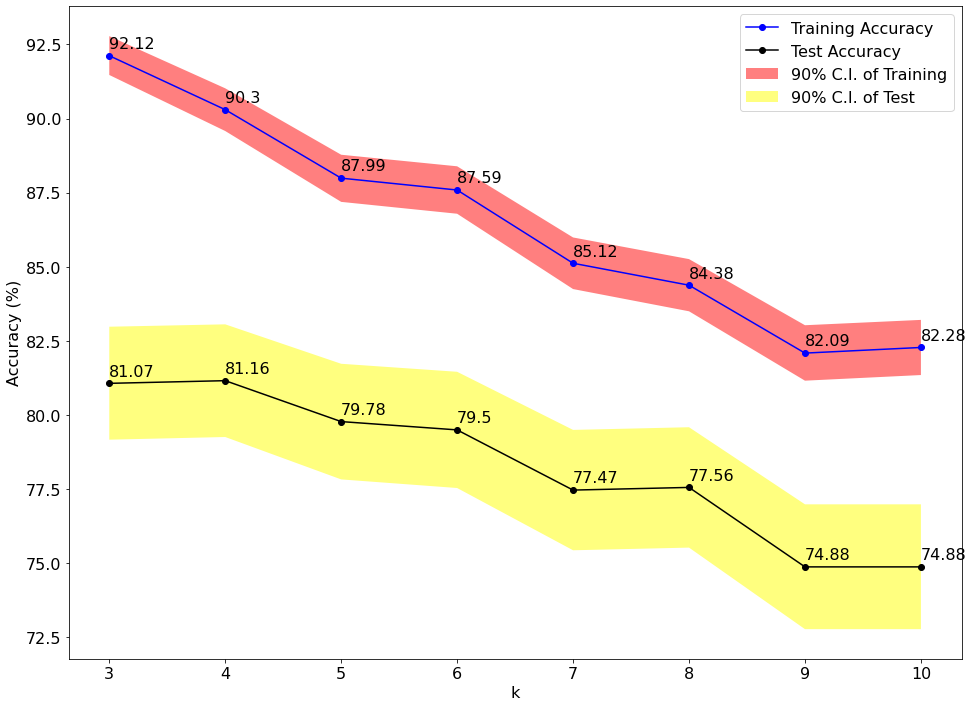

In [17]:
training_CI = sec_perf_table[["k", "Upper Limit(Training)", "Lower Limit(Training)"]]
temp_list_1 = list(zip(training_CI["k"].tolist(), training_CI["Upper Limit(Training)"].tolist()))
temp_list_2 = list(zip(training_CI["k"].tolist(), training_CI["Lower Limit(Training)"].tolist()))
temp_CI_training = temp_list_1 + temp_list_2[::-1]
test_CI = sec_perf_table[["k", "Upper Limit(Test)", "Lower Limit(Test)"]]
temp_list_3 = list(zip(test_CI["k"].tolist(), test_CI["Upper Limit(Test)"].tolist()))
temp_list_4 = list(zip(test_CI["k"].tolist(), test_CI["Lower Limit(Test)"].tolist()))
temp_CI_test = temp_list_3 + temp_list_4[::-1]

fig, ax = plt.subplots(1, 1)
ax.plot(sec_perf_table["k"], sec_perf_table["Training Performance"], label = "Training Accuracy", color = "blue", marker = "o")
ax.plot(sec_perf_table["k"], sec_perf_table["Test Performance"], label = "Test Accuracy", color = "black", marker = "o")

for i in range(len(k)):
    ax.annotate(sec_perf_table.iloc[i, 1], xy = [sec_perf_table.iloc[i, 0], sec_perf_table.iloc[i, 1] + 0.25])
    ax.annotate(sec_perf_table.iloc[i, 4], xy = [sec_perf_table.iloc[i, 0], sec_perf_table.iloc[i, 4] + 0.25])

ax.add_patch(Polygon(np.array(temp_CI_training), facecolor = "red", alpha = 0.5, label = "90% C.I. of Training"))
ax.add_patch(Polygon(np.array(temp_CI_test), facecolor = "yellow", alpha = 0.5, label = "90% C.I. of Test"))

ax.set_xticks(k)
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("k")
ax.legend()
plt.show()

#### Best kNN classifier with k = 4

In [18]:
best_perf_table = pd.DataFrame(columns = ["k", "Training Performance", "Upper Limit(Training)", "Lower Limit(Training)",
                                         "Test Performance", "Upper Limit(Test)", "Lower Limit(Test)", 
                                         "Computing Time(s)"],
                             index = range(1))

start = time.time()
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
end = time.time()
pred_training = knn_model.predict(s_training.iloc[:, 1:])
pred_test = knn_model.predict(s_test.iloc[:, 1:])
    
best_perf_table.iloc[0, 0] = 4
temp_training_accuracy = np.mean(s_training.iloc[:, 0] == pred_training)
temp_training_me = np.sqrt(temp_training_accuracy * (1 - temp_training_accuracy) / len(s_training))
best_perf_table.iloc[0, 1] = round(temp_training_accuracy*100, 2)
best_perf_table.iloc[0, 2] = round((temp_training_accuracy + 1.6*temp_training_me)*100, 2)
best_perf_table.iloc[0, 3] = round((temp_training_accuracy - 1.6*temp_training_me)*100, 2)
temp_test_accuracy = np.mean(s_test.iloc[:, 0] == pred_test)
temp_test_me = np.sqrt(temp_test_accuracy * (1 - temp_test_accuracy) / len(s_test))
best_perf_table.iloc[0, 4] = round(temp_test_accuracy*100, 2)
best_perf_table.iloc[0, 5] = round((temp_test_accuracy + 1.6*temp_test_me)*100, 2)
best_perf_table.iloc[0, 6] = round((temp_test_accuracy - 1.6*temp_test_me)*100, 2)
best_perf_table.iloc[0, 7] = round(end - start, 2)
    
best_perf_table[["k", "Training Performance", "Test Performance", "Computing Time(s)"]]

,k,Training Performance,Test Performance,Computing Time(s)
0,4,90.3,81.16,0.1


### 2.4 Compute the confusion matrix

In [19]:
from sklearn import metrics
conf_matrix_training = round(pd.DataFrame(metrics.confusion_matrix(s_training.iloc[:, 0], pred_training, 
                                                                   normalize = "true", labels = [1, 2, 3, 4]), 
                                          index = ["CL1", "CL2", "CL3", "CL4"], 
                                          columns = ["CL1", "CL2", "CL3", "CL4"])*100, 2)
conf_matrix_training.index.name = "True"
conf_matrix_training.columns.name = "Predicted"
conf_matrix_training

Predicted,CL1,CL2,CL3,CL4
True,,,,
CL1,91.43,1.80,4.37,2.40
CL2,8.26,83.48,3.81,4.45
CL3,1.99,2.93,93.82,1.26
CL4,1.81,2.54,2.81,92.84


In [20]:
conf_matrix_test = round(pd.DataFrame(metrics.confusion_matrix(s_test.iloc[:, 0], pred_test, normalize = "true", 
                                                                   labels = [1, 2, 3, 4]), 
                                          index = ["CL1", "CL2", "CL3", "CL4"], 
                                          columns = ["CL1", "CL2", "CL3", "CL4"])*100, 2)
conf_matrix_test.index.name = "True"
conf_matrix_test.columns.name = "Predicted"
conf_matrix_test

Predicted,CL1,CL2,CL3,CL4
True,,,,
CL1,85.96,4.11,3.08,6.85
CL2,10.87,66.30,10.51,12.32
CL3,1.67,5.86,87.03,5.44
CL4,5.07,4.35,4.71,85.87


### 2.5 Misclassification

In [21]:
from scipy.spatial import distance_matrix
s_df_dist_matrix = pd.DataFrame(distance_matrix(s_df.iloc[:, 1:], s_df.iloc[:, 1:]))
s_df_dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,5401,5402,5403,5404,5405,5406,5407,5408,5409,5410
0,0.000000,9.514343,0.000000,9.514343,33.612397,29.018155,26.259053,26.731292,27.060870,35.657798,...,30.993149,34.469529,30.993149,30.993149,30.993149,30.993149,30.993149,30.993149,30.993149,30.993149
1,9.514343,0.000000,9.514343,0.000000,32.672619,27.288816,26.521893,27.976015,27.074107,34.581681,...,31.173286,33.682024,31.173286,31.173286,31.173286,31.173286,31.173286,31.173286,31.173286,31.173286
2,0.000000,9.514343,0.000000,9.514343,33.612397,29.018155,26.259053,26.731292,27.060870,35.657798,...,30.993149,34.469529,30.993149,30.993149,30.993149,30.993149,30.993149,30.993149,30.993149,30.993149
3,9.514343,0.000000,9.514343,0.000000,32.672619,27.288816,26.521893,27.976015,27.074107,34.581681,...,31.173286,33.682024,31.173286,31.173286,31.173286,31.173286,31.173286,31.173286,31.173286,31.173286
4,33.612397,32.672619,33.612397,32.672619,0.000000,31.128019,31.162169,30.129791,32.668702,28.403386,...,30.861125,29.004107,30.861125,30.861125,30.861125,30.861125,30.861125,30.861125,30.861125,30.861125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,30.993149,31.173286,30.993149,31.173286,30.861125,31.815904,31.482573,33.816387,31.499831,35.751448,...,0.000000,14.302821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5407,30.993149,31.173286,30.993149,31.173286,30.861125,31.815904,31.482573,33.816387,31.499831,35.751448,...,0.000000,14.302821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5408,30.993149,31.173286,30.993149,31.173286,30.861125,31.815904,31.482573,33.816387,31.499831,35.751448,...,0.000000,14.302821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5409,30.993149,31.173286,30.993149,31.173286,30.861125,31.815904,31.482573,33.816387,31.499831,35.751448,...,0.000000,14.302821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Class 2 but misclassified as Class 1

In [22]:
ERR21_case_neighbor = pd.DataFrame(index = ["Neighbor " + str(i + 1) for i in range(4)], 
                                   columns = ["Case #", "Distance", "TRUC"])
ERR21 = s_test[(s_test["TRUC"] == 2) & (pred_test == 1)].index
ERR21_case = ERR21[0]
for i in range(4):
    temp_case_dist = s_df_dist_matrix.iloc[ERR21_case, :].sort_values(ascending = True)
    temp_neighbor_dist = temp_case_dist.values[i + 1]
    temp_neighbor = temp_case_dist.index[i + 1]
    temp_neighbor_TRUC = s_df.iloc[temp_neighbor, 0]
    ERR21_case_neighbor.iloc[i, 0] = temp_neighbor
    ERR21_case_neighbor.iloc[i, 1] = temp_neighbor_dist
    ERR21_case_neighbor.iloc[i, 2] = temp_neighbor_TRUC
    
ERR21_case_neighbor

,Case #,Distance,TRUC
Neighbor 1,2168,7.59498,2
Neighbor 2,1181,11.4898,1
Neighbor 3,889,11.575,1
Neighbor 4,305,11.8794,1


#### Class 2 but misclassified as Class 3

In [23]:
ERR23_case_neighbor = pd.DataFrame(index = ["Neighbor " + str(i + 1) for i in range(4)], 
                                   columns = ["Case #", "Distance", "TRUC"])
ERR23 = s_test[(s_test["TRUC"] == 2) & (pred_test == 3)].index
ERR23_case = ERR23[0]
for i in range(4):
    temp_case_dist = s_df_dist_matrix.iloc[ERR23_case, :].sort_values(ascending = True)
    temp_neighbor_dist = temp_case_dist.values[i + 1]
    temp_neighbor = temp_case_dist.index[i + 1]
    temp_neighbor_TRUC = s_df.iloc[temp_neighbor, 0]
    ERR23_case_neighbor.iloc[i, 0] = temp_neighbor
    ERR23_case_neighbor.iloc[i, 1] = temp_neighbor_dist
    ERR23_case_neighbor.iloc[i, 2] = temp_neighbor_TRUC
    
ERR23_case_neighbor

,Case #,Distance,TRUC
Neighbor 1,2462,9.97768,2
Neighbor 2,3780,19.5805,3
Neighbor 3,3063,19.6608,3
Neighbor 4,2985,19.8814,3


#### Class 2 but misclassified as Class 4

In [27]:
ERR24_case_neighbor = pd.DataFrame(index = ["Neighbor " + str(i + 1) for i in range(4)], 
                                   columns = ["Case #", "Distance", "TRUC"])
ERR24 = s_test[(s_test["TRUC"] == 2) & (pred_test == 4)].index
ERR24_case = ERR24[0]
for i in range(4):
    temp_case_dist = s_df_dist_matrix.iloc[ERR24_case, :].sort_values(ascending = True)
    temp_neighbor_dist = temp_case_dist.values[i + 1]
    temp_neighbor = temp_case_dist.index[i + 1]
    temp_neighbor_TRUC = s_df.iloc[temp_neighbor, 0]
    ERR24_case_neighbor.iloc[i, 0] = temp_neighbor
    ERR24_case_neighbor.iloc[i, 1] = temp_neighbor_dist
    ERR24_case_neighbor.iloc[i, 2] = temp_neighbor_TRUC
    
ERR24_case_neighbor

,Case #,Distance,TRUC
Neighbor 1,1976,6.4933,2
Neighbor 2,1287,7.59535,1
Neighbor 3,4508,7.95188,4
Neighbor 4,4752,7.95188,4


## Problem 2

### 3.1 Eigenvalue and Eigenvector

In [42]:
SCORR = s_df.iloc[:, 1:].corr()
temp_eig = np.linalg.eig(SCORR)
temp_eig_value = temp_eig[0]
idx = temp_eig_value.argsort()[::-1]

eig_value = temp_eig[0][idx]
eig_vector = temp_eig[1][:, idx]
pd.DataFrame(eig_vector)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.012013,0.056463,-0.120618,-0.050416,-0.015503,0.010372,0.006532,-0.046900,0.039182,0.017304,...,-0.005486,0.000068,-0.021173,-0.012512,-0.016867,-0.023477,0.002225,-0.017852,-0.002074,0.002564
1,0.015883,0.052610,-0.126482,-0.051349,-0.006600,-0.011127,0.000382,-0.034549,0.048279,0.011117,...,0.023623,0.000109,0.029568,0.002738,0.009021,0.035982,0.005640,0.022687,0.014119,0.000314
2,0.019213,0.050883,-0.119878,-0.046024,0.001484,-0.044238,-0.006695,-0.025657,0.055919,0.022761,...,-0.025306,-0.003809,-0.013754,0.006824,-0.014098,-0.036929,-0.025512,-0.007111,-0.007981,-0.005862
3,0.022166,0.046739,-0.109886,-0.033215,0.003871,-0.072930,-0.012961,-0.031281,0.052817,0.034197,...,0.012115,-0.003954,0.017845,-0.006917,0.030361,0.025849,0.017259,-0.001984,-0.003401,0.008124
4,0.027336,0.047061,-0.097759,-0.014618,-0.004096,-0.079489,-0.020260,-0.049330,0.039061,0.031328,...,-0.001060,0.006713,-0.020856,-0.000427,-0.008022,0.000857,-0.015710,0.004042,0.005894,-0.002658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.034868,0.038164,-0.035847,-0.036703,-0.096638,-0.080375,-0.015763,0.006776,0.025798,0.049866,...,0.011520,0.018243,0.024933,0.011609,-0.006612,0.009167,-0.009966,0.016909,-0.002675,-0.011432
396,0.031087,0.037375,-0.045240,-0.060635,-0.096028,-0.079724,-0.024191,0.013713,0.007455,0.045761,...,-0.008148,-0.026308,-0.021804,-0.000209,0.010228,0.016386,0.015562,-0.021241,0.014347,0.003903
397,0.026332,0.040037,-0.053557,-0.080695,-0.098271,-0.061508,-0.039863,0.030860,-0.030371,0.029479,...,0.010457,0.037369,0.021378,0.026713,-0.017848,-0.030831,-0.037336,0.033113,0.002385,0.002172
398,0.020597,0.040337,-0.061457,-0.088172,-0.101519,-0.034808,-0.051184,0.040217,-0.062373,0.014663,...,0.000363,-0.034354,-0.006825,-0.026802,0.020269,0.020116,0.040915,-0.026200,-0.014391,0.001473


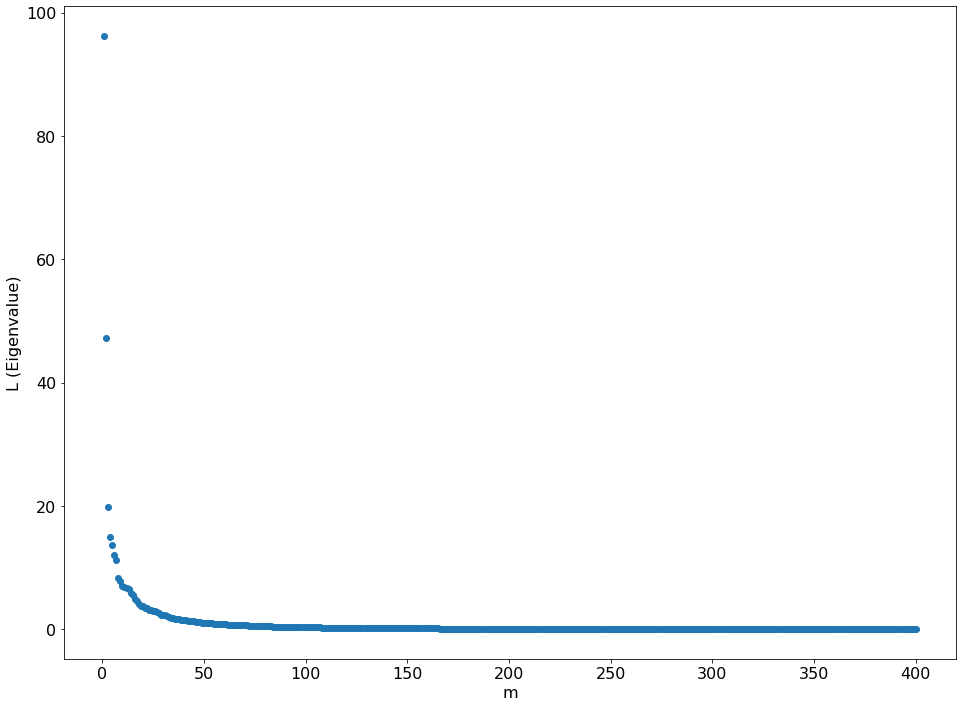

In [26]:
plt.scatter(range(1,401), eig_value)
plt.xlabel("m")
plt.ylabel("L (Eigenvalue)")
plt.show()

### 3.2 Percentage of Explained Variance (PEV)

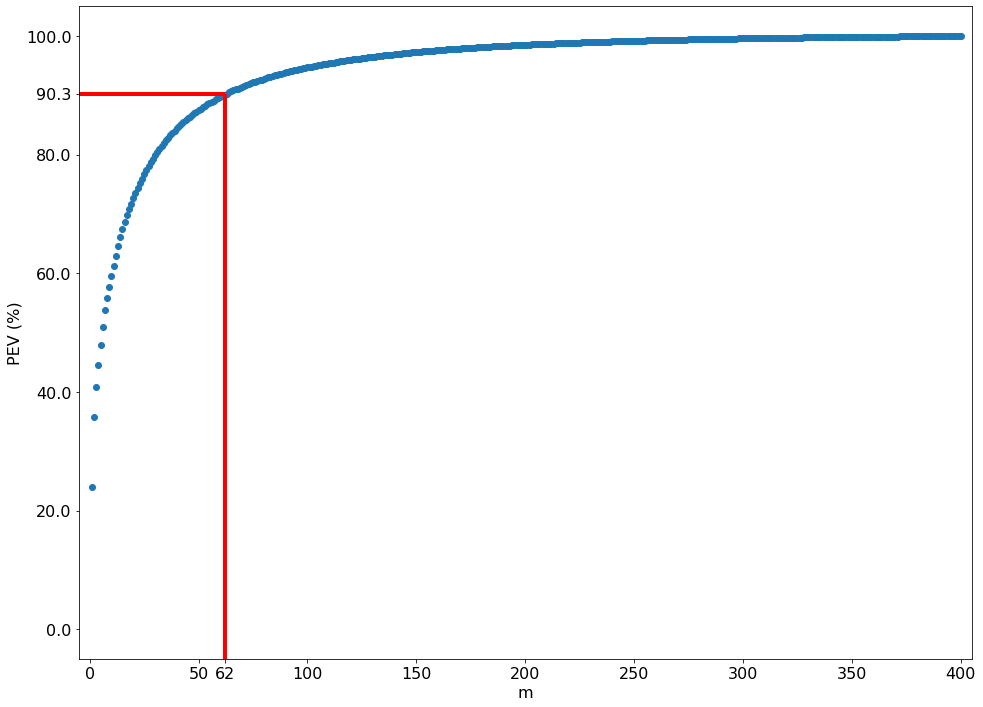

In [28]:
PEV = (eig_value.cumsum()/400)*100
smallest_r = sum(PEV < 90) + 1
fig, ax = plt.subplots(1, 1)
ax.scatter(range(1,401), PEV)

ax.hlines(PEV[smallest_r], xmin = -5, xmax = smallest_r, color = "red", lw = 4)
ax.vlines(smallest_r, ymin = -5, ymax = PEV[smallest_r], color = "red", lw = 4)

ax.set_xlabel("m")
ax.set_ylabel("PEV (%)")
ax.set_xlim([-5, 405])
ax.set_ylim([-5, 105])
ax.set_xticks([0, 50, 62, 100, 150, 200, 250, 300, 350, 400])
ax.set_yticks([0, 20, 40, 60, 80, 90.32, 100])

plt.show()

### 3.3 Principal Component Analysis Data Set

In [29]:
PCA_df = pd.concat([s_df.iloc[:, 0], pd.DataFrame(np.dot(s_df.iloc[:, 1:], eig_vector), columns = range(1, 401))], axis = 1)
PCA_df_truncated = PCA_df.iloc[:, :smallest_r + 1]
PCA_df_truncated

,TRUC,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,1,20.332784,1.244968,2.770551,-2.108697,2.092227,-1.404583,-2.925979,6.147425,-0.176731,...,0.076148,1.172436,-1.839684,0.380400,0.243611,0.135824,0.476836,0.503615,0.579575,-1.348265
1,1,17.831947,0.657077,4.138162,-3.398261,-0.133968,0.728075,-2.771573,5.780410,-0.457113,...,0.397738,1.356670,-1.865610,-0.056153,0.973844,0.657121,0.296229,-0.047840,0.159664,-1.496714
2,1,20.332784,1.244968,2.770551,-2.108697,2.092227,-1.404583,-2.925979,6.147425,-0.176731,...,0.076148,1.172436,-1.839684,0.380400,0.243611,0.135824,0.476836,0.503615,0.579575,-1.348265
3,1,17.831947,0.657077,4.138162,-3.398261,-0.133968,0.728075,-2.771573,5.780410,-0.457113,...,0.397738,1.356670,-1.865610,-0.056153,0.973844,0.657121,0.296229,-0.047840,0.159664,-1.496714
4,1,-5.703227,-3.046316,5.904054,1.294242,4.690338,0.800444,2.485547,-0.529631,0.094875,...,-1.027921,0.542441,-1.085625,-1.378583,1.267574,-0.520335,-1.402115,1.286168,0.096062,-0.509746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,4,1.651691,19.066567,-3.292475,-2.381131,0.832540,-2.213316,-2.678367,-2.430246,2.249833,...,0.120819,-0.305131,0.649797,-1.089859,0.104004,-0.867265,-0.337076,-0.432950,0.854959,-0.240174
5407,4,1.651691,19.066567,-3.292475,-2.381131,0.832540,-2.213316,-2.678367,-2.430246,2.249833,...,0.120819,-0.305131,0.649797,-1.089859,0.104004,-0.867265,-0.337076,-0.432950,0.854959,-0.240174
5408,4,1.651691,19.066567,-3.292475,-2.381131,0.832540,-2.213316,-2.678367,-2.430246,2.249833,...,0.120819,-0.305131,0.649797,-1.089859,0.104004,-0.867265,-0.337076,-0.432950,0.854959,-0.240174
5409,4,1.651691,19.066567,-3.292475,-2.381131,0.832540,-2.213316,-2.678367,-2.430246,2.249833,...,0.120819,-0.305131,0.649797,-1.089859,0.104004,-0.867265,-0.337076,-0.432950,0.854959,-0.240174


In [40]:
pd.DataFrame(eig_vector)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.012013,0.056463,-0.120618,-0.050416,-0.015503,0.010372,0.006532,-0.046900,0.039182,0.017304,...,-0.005486,0.000068,-0.021173,-0.012512,-0.016867,-0.023477,0.002225,-0.017852,-0.002074,0.002564
1,0.015883,0.052610,-0.126482,-0.051349,-0.006600,-0.011127,0.000382,-0.034549,0.048279,0.011117,...,0.023623,0.000109,0.029568,0.002738,0.009021,0.035982,0.005640,0.022687,0.014119,0.000314
2,0.019213,0.050883,-0.119878,-0.046024,0.001484,-0.044238,-0.006695,-0.025657,0.055919,0.022761,...,-0.025306,-0.003809,-0.013754,0.006824,-0.014098,-0.036929,-0.025512,-0.007111,-0.007981,-0.005862
3,0.022166,0.046739,-0.109886,-0.033215,0.003871,-0.072930,-0.012961,-0.031281,0.052817,0.034197,...,0.012115,-0.003954,0.017845,-0.006917,0.030361,0.025849,0.017259,-0.001984,-0.003401,0.008124
4,0.027336,0.047061,-0.097759,-0.014618,-0.004096,-0.079489,-0.020260,-0.049330,0.039061,0.031328,...,-0.001060,0.006713,-0.020856,-0.000427,-0.008022,0.000857,-0.015710,0.004042,0.005894,-0.002658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.034868,0.038164,-0.035847,-0.036703,-0.096638,-0.080375,-0.015763,0.006776,0.025798,0.049866,...,0.011520,0.018243,0.024933,0.011609,-0.006612,0.009167,-0.009966,0.016909,-0.002675,-0.011432
396,0.031087,0.037375,-0.045240,-0.060635,-0.096028,-0.079724,-0.024191,0.013713,0.007455,0.045761,...,-0.008148,-0.026308,-0.021804,-0.000209,0.010228,0.016386,0.015562,-0.021241,0.014347,0.003903
397,0.026332,0.040037,-0.053557,-0.080695,-0.098271,-0.061508,-0.039863,0.030860,-0.030371,0.029479,...,0.010457,0.037369,0.021378,0.026713,-0.017848,-0.030831,-0.037336,0.033113,0.002385,0.002172
398,0.020597,0.040337,-0.061457,-0.088172,-0.101519,-0.034808,-0.051184,0.040217,-0.062373,0.014663,...,0.000363,-0.034354,-0.006825,-0.026802,0.020269,0.020116,0.040915,-0.026200,-0.014391,0.001473


### 3.4 kNN on PCA data set

In [30]:
PCA_training = PCA_df_truncated.iloc[s_training.index, :]
PCA_test = PCA_df_truncated.iloc[s_test.index, :]

In [31]:
PCA_perf_table = pd.DataFrame(columns = ["k", "Training Performance", "Upper Limit(Training)", "Lower Limit(Training)",
                                         "Test Performance", "Upper Limit(Test)", "Lower Limit(Test)", 
                                         "Computing Time(s)"],
                             index = range(1))

start = time.time()
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(PCA_training.iloc[:, 1:], PCA_training.iloc[:, 0])
end = time.time()
pred_training = knn_model.predict(PCA_training.iloc[:, 1:])
pred_test = knn_model.predict(PCA_test.iloc[:, 1:])
    
PCA_perf_table.iloc[0, 0] = 4
temp_training_accuracy = np.mean(PCA_training.iloc[:, 0] == pred_training)
temp_training_me = np.sqrt(temp_training_accuracy * (1 - temp_training_accuracy) / len(PCA_training))
PCA_perf_table.iloc[0, 1] = round(temp_training_accuracy*100, 2)
PCA_perf_table.iloc[0, 2] = round((temp_training_accuracy + 1.6*temp_training_me)*100, 2)
PCA_perf_table.iloc[0, 3] = round((temp_training_accuracy - 1.6*temp_training_me)*100, 2)
temp_test_accuracy = np.mean(PCA_test.iloc[:, 0] == pred_test)
temp_test_me = np.sqrt(temp_test_accuracy * (1 - temp_test_accuracy) / len(PCA_test))
PCA_perf_table.iloc[0, 4] = round(temp_test_accuracy*100, 2)
PCA_perf_table.iloc[0, 5] = round((temp_test_accuracy + 1.6*temp_test_me)*100, 2)
PCA_perf_table.iloc[0, 6] = round((temp_test_accuracy - 1.6*temp_test_me)*100, 2)
PCA_perf_table.iloc[0, 7] = round(end - start, 2)
    
PCA_perf_table[["k", "Training Performance", "Test Performance", "Computing Time(s)"]]

,k,Training Performance,Test Performance,Computing Time(s)
0,4,89.7,81.53,0.02


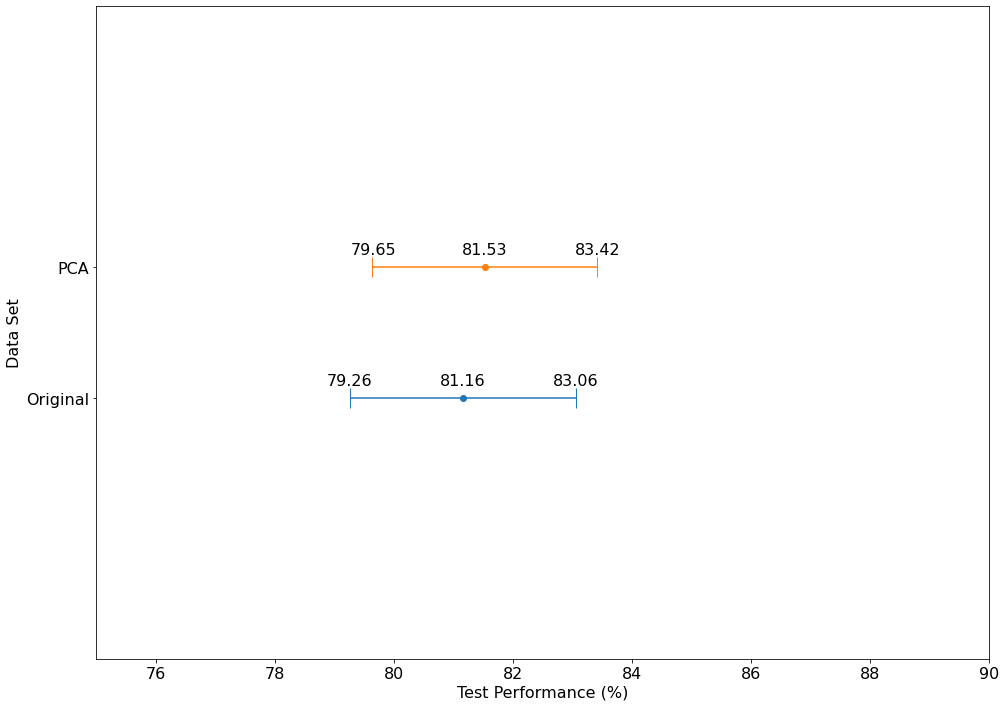

In [32]:
fig, ax = plt.subplots(1, 1)
ax.errorbar(best_perf_table.loc[0, "Test Performance"], 0.4, 
            xerr = best_perf_table.loc[0, "Upper Limit(Test)"] - best_perf_table.loc[0, "Test Performance"], 
            marker = 'o', capsize = 10)
ax.errorbar(PCA_perf_table.loc[0, "Test Performance"], 0.6, 
            xerr = PCA_perf_table.loc[0, "Upper Limit(Test)"] - PCA_perf_table.loc[0, "Test Performance"], 
            marker = 'o', capsize = 10)

ax.text(PCA_perf_table.loc[0, "Test Performance"], 0.62, PCA_perf_table.loc[0, "Test Performance"], ha = "center")
ax.text(PCA_perf_table.loc[0, "Upper Limit(Test)"], 0.62, PCA_perf_table.loc[0, "Upper Limit(Test)"], ha = "center")
ax.text(PCA_perf_table.loc[0, "Lower Limit(Test)"], 0.62, PCA_perf_table.loc[0, "Lower Limit(Test)"], ha = "center")
ax.text(best_perf_table.loc[0, "Test Performance"], 0.42, best_perf_table.loc[0, "Test Performance"], ha = "center")
ax.text(best_perf_table.loc[0, "Upper Limit(Test)"], 0.42, best_perf_table.loc[0, "Upper Limit(Test)"], ha = "center")
ax.text(best_perf_table.loc[0, "Lower Limit(Test)"], 0.42, best_perf_table.loc[0, "Lower Limit(Test)"], ha = "center")

ax.set_yticks([0.4, 0.6])
ax.set_yticklabels(["Original", "PCA"])
ax.set_xlim([75, 90])
ax.set_ylim([0, 1])
ax.set_xlabel("Test Performance (%)")
ax.set_ylabel("Data Set")

plt.show()

### 3.5 Plot each class on 2D.

In [33]:
CL1_2d = PCA_df_truncated[(PCA_df_truncated["TRUC"] == 1)].iloc[:, 1: 3]
CL2_2d = PCA_df_truncated[(PCA_df_truncated["TRUC"] == 2)].iloc[:, 1: 3]
CL3_2d = PCA_df_truncated[(PCA_df_truncated["TRUC"] == 3)].iloc[:, 1: 3]
CL4_2d = PCA_df_truncated[(PCA_df_truncated["TRUC"] == 4)].iloc[:, 1: 3]

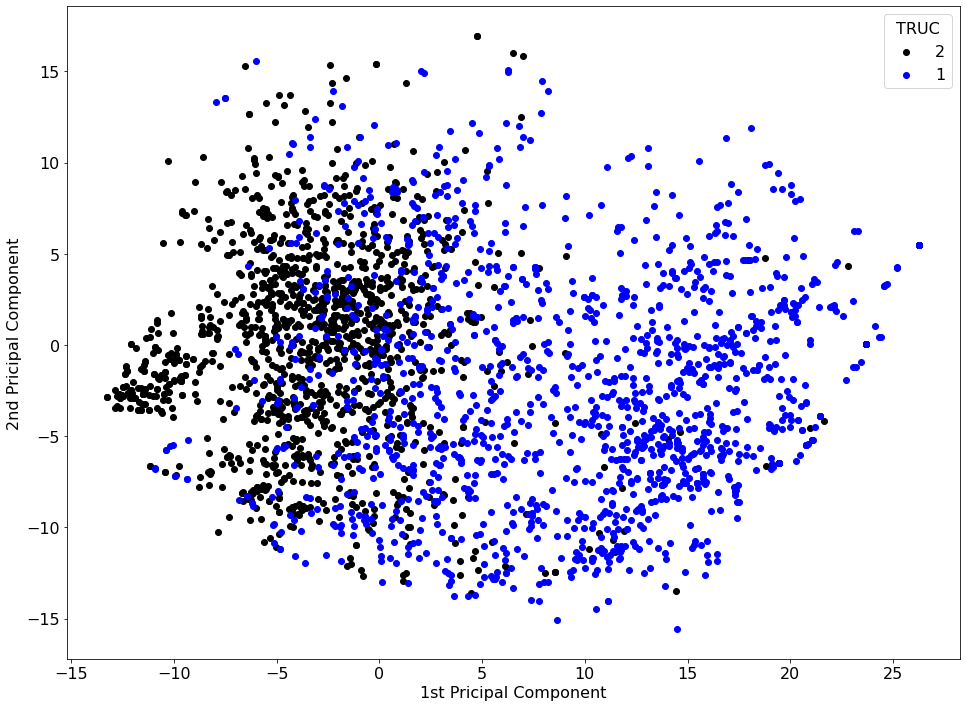

In [34]:
fig, ax = plt.subplots(1, 1)
ax.scatter(CL2_2d.iloc[:, 0], CL2_2d.iloc[:, 1], color = "black", label = "2")
ax.scatter(CL1_2d.iloc[:, 0], CL1_2d.iloc[:, 1], color = "blue", label = "1")
ax.set_xlabel("1st Pricipal Component")
ax.set_ylabel("2nd Pricipal Component")
ax.legend(title = "TRUC")
plt.show()

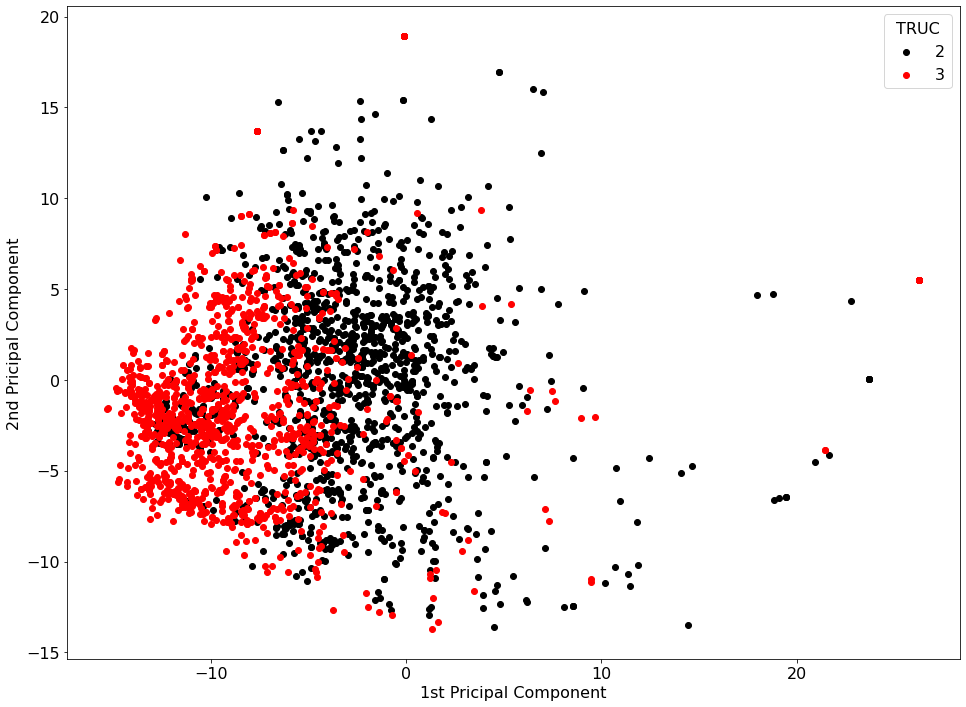

In [35]:
fig, ax = plt.subplots(1, 1)
ax.scatter(CL2_2d.iloc[:, 0], CL2_2d.iloc[:, 1], color = "black", label = "2")
ax.scatter(CL3_2d.iloc[:, 0], CL3_2d.iloc[:, 1], color = "red", label = "3")
ax.set_xlabel("1st Pricipal Component")
ax.set_ylabel("2nd Pricipal Component")
ax.legend(title = "TRUC")
plt.show()

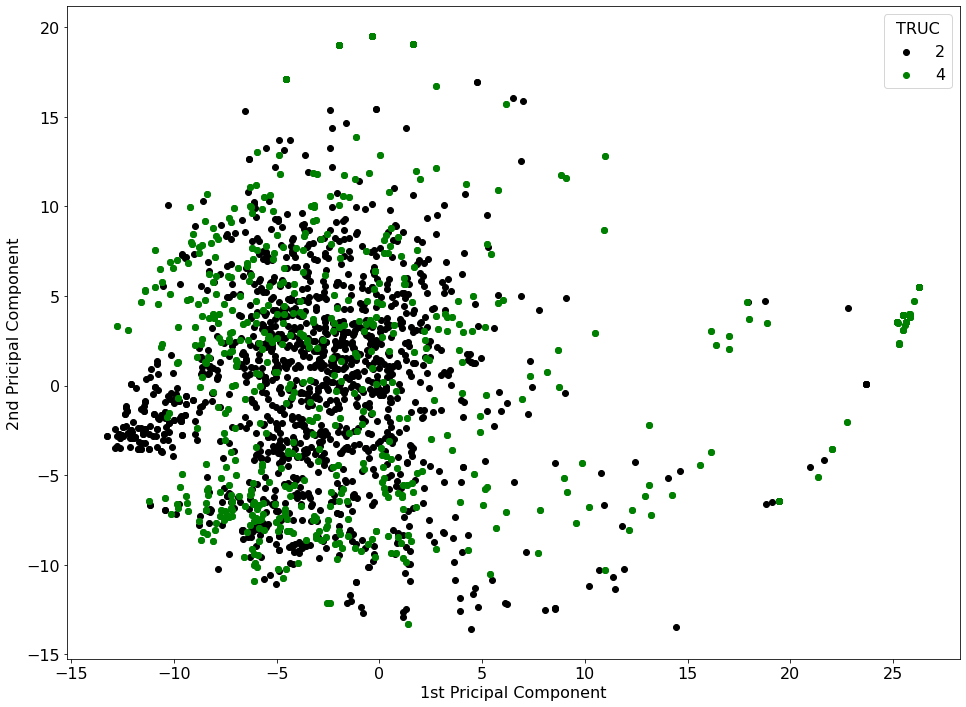

In [36]:
fig, ax = plt.subplots(1, 1)
ax.scatter(CL2_2d.iloc[:, 0], CL2_2d.iloc[:, 1], color = "black", label = "2")
ax.scatter(CL4_2d.iloc[:, 0], CL4_2d.iloc[:, 1], color = "green", label = "4")
ax.set_xlabel("1st Pricipal Component")
ax.set_ylabel("2nd Pricipal Component")
ax.legend(title = "TRUC")
plt.show()

### 3.6 Plot class 2 and its misclassified cases on 2D.

In [37]:
ZERR21 = PCA_test[(PCA_test["TRUC"] == 2) & (pred_test == 1)]
ZERR23 = PCA_test[(PCA_test["TRUC"] == 2) & (pred_test == 3)]
ZERR24 = PCA_test[(PCA_test["TRUC"] == 2) & (pred_test == 4)]

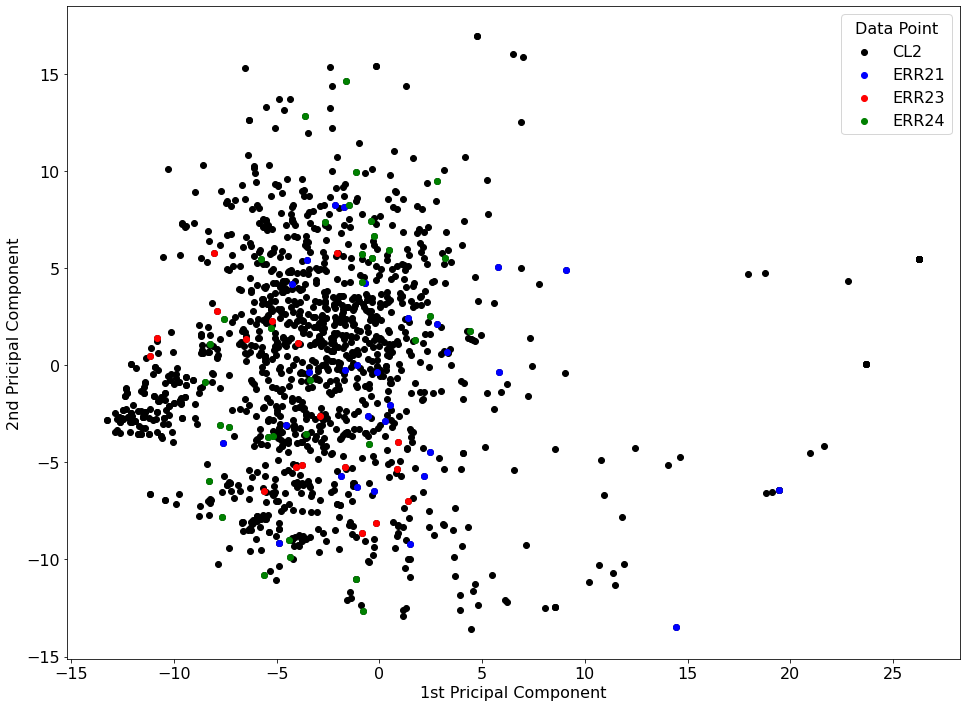

In [38]:
fig, ax = plt.subplots(1, 1)
ax.scatter(CL2_2d.iloc[:, 0], CL2_2d.iloc[:, 1], color = "black", label = "CL2")
ax.scatter(ZERR21.iloc[:, 1], ZERR21.iloc[:, 2], color = "blue", label = "ERR21")
ax.scatter(ZERR23.iloc[:, 1], ZERR23.iloc[:, 2], color = "red", label = "ERR23")
ax.scatter(ZERR24.iloc[:, 1], ZERR24.iloc[:, 2], color = "green", label = "ERR24")
ax.set_xlabel("1st Pricipal Component")
ax.set_ylabel("2nd Pricipal Component")
ax.legend(title = "Data Point")
plt.show()